In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def malla(limits,nps,d=0,n=0):
    """
    Genera una malla para n variables especificando los límites o el numero de variables.

    Parameters:
    - limits (list of tuples or lists): Lista de tuplas o listas que representan los límites para cada variable.
    - nps (list of int): Lista de enteros que representa el número de puntos o la distancia entre ellos para cada variable.
    - d (int, optional): Si es 1, utiliza np.arange para generar la malla indicando que nps es la separación entre puntos
                        ;si es 0 (por defecto), utiliza np.linspace, y nps será el número de puntos.
    - n (int, optional): Si es mayor que 0, repite los límites y el número de puntos n veces para generar una malla n-dimensional.

    Returns:
    - X (numpy.ndarray): Matriz que representa la malla generada.
    - v (list of numpy.ndarray): Lista de arrays que contiene las variables a lo largo de cada dimensión.

    Raises:
    - ValueError: Si el número de condiciones de límites y puntos no coincide.

    Example:
    >>> limits = [(0, 1), (0, 2), (0, 3)]
    >>> nps = [3, 4, 2]
    >>> X, v = malla(limits, nps)
    """
    n_lim=len(limits)
    n_nps=len(nps)
    if n:
        limits,nps=[limits[0]]*n,[nps[0]]*n
    else:
        if (n_lim!=n_nps):
            raise ValueError("El número de condiciones de límites y puntos no coincide.")
        n=len(limits)
    if d:
        variables = [np.arange(l[0], l[1], nps[i]) for i,l in enumerate(limits)]
    else:
        variables = [np.linspace(l[0], l[1], nps[i]) for i,l in enumerate(limits)]
    meshgrid = np.meshgrid(*variables, indexing='ij')
    v=[axis.ravel() for axis in meshgrid[:n]]
    
    return np.c_[*v],v

AttributeError: PathCollection.set() got an unexpected keyword argument 'levels'

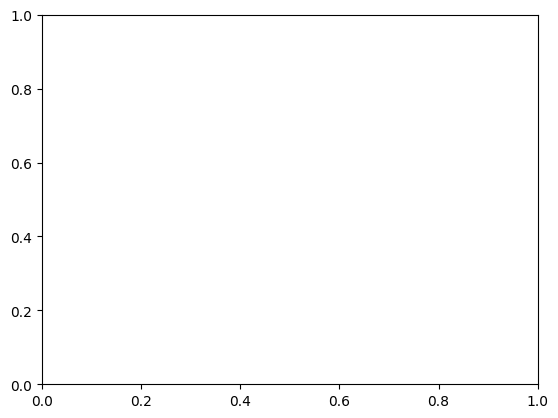

In [9]:
X,v=malla([[-5,5],[-5,5]],[50,50])

z=X[:, 0]**2+X[:, 1]**2

plt.scatter(v[0], v[1], c=z, levels=20 ,cmap='viridis')
plt.show()


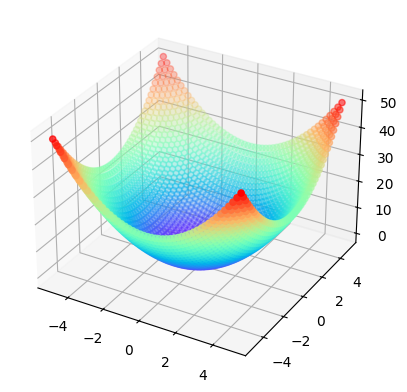

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(v[0], v[1], z, c=z, cmap='rainbow')
plt.show()

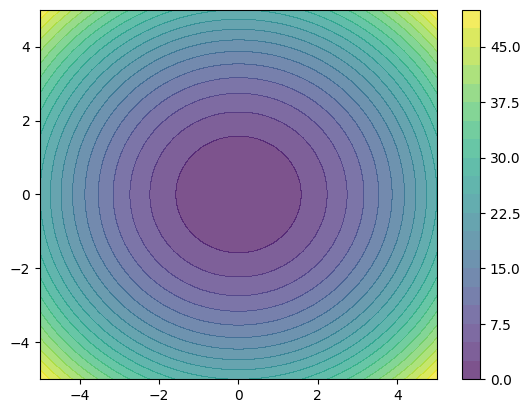

array([[50.        , 48.00083299, 46.0849646 , ..., 46.0849646 ,
        48.00083299, 50.        ],
       [48.00083299, 46.00166597, 44.08579758, ..., 44.08579758,
        46.00166597, 48.00083299],
       [46.0849646 , 44.08579758, 42.1699292 , ..., 42.1699292 ,
        44.08579758, 46.0849646 ],
       ...,
       [46.0849646 , 44.08579758, 42.1699292 , ..., 42.1699292 ,
        44.08579758, 46.0849646 ],
       [48.00083299, 46.00166597, 44.08579758, ..., 44.08579758,
        46.00166597, 48.00083299],
       [50.        , 48.00083299, 46.0849646 , ..., 46.0849646 ,
        48.00083299, 50.        ]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos de malla
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Calcular valores para el contorno (ejemplo: una función cuadrática)
Z = X**2 + Y**2

# Crear el gráfico de contorno lleno
plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)

# Añadir una barra de colores
plt.colorbar()

# Mostrar el gráfico
plt.show()
Z

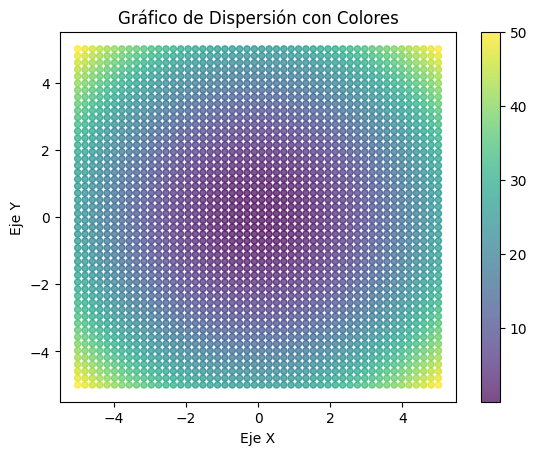

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos de malla
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Calcular valores para el contorno (ejemplo: una función cuadrática)
Z = X**2 + Y**2

# Crear un gráfico de dispersión (scatter plot)
plt.scatter(X.flatten(), Y.flatten(), c=Z.flatten(), cmap='viridis', s=20, alpha=0.7)

# Añadir una barra de colores
plt.colorbar()

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Dispersión con Colores')

# Mostrar el gráfico
plt.show()


In [ ]:
from f_func import malla
X,v,Xp=malla([[-5,5]],[5],0,2)
print(f'X:{X[:,0]} fin')
print(f'Y:{X[:,1]} fin')
print(f'Xp:{Xp[0]} fin')
print(f'Yp:{Xp[1]} fin')
print(f'Xp^2:{Xp[0]**2} fin')
print(f'Yp^2:{Xp[1]**2} fin')
print(f'Zp:{Xp[0]**2+Xp[1]**2} fin')
print(f'Z:{X[:,0]**2+X[:,1]**2} fin')

ValueError: not enough values to unpack (expected 3, got 2)

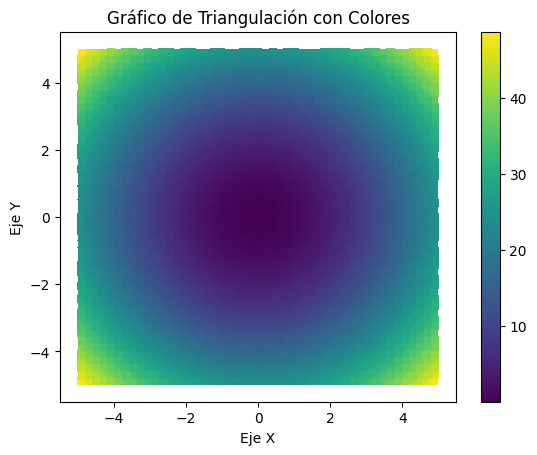

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from f_func import malla

# Generar datos aleatorios
np.random.seed(42)
num_points = 1000
# x = np.random.uniform(-5, 5, num_points)
# y = np.random.uniform(-5, 5, num_points)
X,Xp =malla([[-5,5]],[50],0,2)
z = X[:,0]**2 + X[:,1]**2

# Triangulación
triang = tri.Triangulation(X[:,0], X[:,1])

# Crear el gráfico de triangulación con colores
plt.tripcolor(triang, z, cmap='viridis')

# Añadir una barra de colores
plt.colorbar()

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Triangulación con Colores')

# Mostrar el gráfico
plt.show()



In [ ]:
X,v,Xp=malla([[-5,5]],[5],0,3)
Xp[0]

array([[[-5. , -5. , -5. , -5. , -5. ],
        [-5. , -5. , -5. , -5. , -5. ],
        [-5. , -5. , -5. , -5. , -5. ],
        [-5. , -5. , -5. , -5. , -5. ],
        [-5. , -5. , -5. , -5. , -5. ]],

       [[-2.5, -2.5, -2.5, -2.5, -2.5],
        [-2.5, -2.5, -2.5, -2.5, -2.5],
        [-2.5, -2.5, -2.5, -2.5, -2.5],
        [-2.5, -2.5, -2.5, -2.5, -2.5],
        [-2.5, -2.5, -2.5, -2.5, -2.5]],

       [[ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ]],

       [[ 2.5,  2.5,  2.5,  2.5,  2.5],
        [ 2.5,  2.5,  2.5,  2.5,  2.5],
        [ 2.5,  2.5,  2.5,  2.5,  2.5],
        [ 2.5,  2.5,  2.5,  2.5,  2.5],
        [ 2.5,  2.5,  2.5,  2.5,  2.5]],

       [[ 5. ,  5. ,  5. ,  5. ,  5. ],
        [ 5. ,  5. ,  5. ,  5. ,  5. ],
        [ 5. ,  5. ,  5. ,  5. ,  5. ],
        [ 5. ,  5. ,  5. ,  5. ,  5. ],
        [ 5. ,  5. ,  5. ,  5. ,

In [ ]:
n,m=17,2
-(-n // m)

9

In [ ]:
a=np.array([1,2,3,4,5] )
b=np.array([[1],[2],[3],[4],[5]])

a.shape

(5,)

In [ ]:
import numpy as np

def custom_grid_search(X, n_splits=5, random_state=None):
    """
    Realiza particiones aleatorias de los datos para validación cruzada y las rota ciclicamente.

    Parameters:
    - X: Datos a particionar.
    - n_splits: Número de divisiones para la validación cruzada.
    - random_state: Semilla para la reproducibilidad.

    Returns:
    - Una lista de tuplas, donde cada tupla contiene los índices de entrenamiento y prueba para cada iteración.
    """
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    splits = []
    fold_size = len(X) // n_splits

    for i in range(n_splits):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        splits.append((train_indices, test_indices))

    return splits

# Ejemplo de uso
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
splits = custom_grid_search(X, n_splits=3, random_state=42)

# Iterar sobre las particiones
for i, (train_index, test_index) in enumerate(splits):
    print(f"Iteración {i + 1}:")
    print("Conjunto de entrenamiento:", train_index)
    print("Conjunto de prueba:", test_index)
    print()

Iteración 1:
Conjunto de entrenamiento: [4 2 0 3]
Conjunto de prueba: [1]

Iteración 2:
Conjunto de entrenamiento: [1 2 0 3]
Conjunto de prueba: [4]

Iteración 3:
Conjunto de entrenamiento: [1 4 0 3]
Conjunto de prueba: [2]



In [ ]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y=np.array([1, 3, 5, 7, 9])
X[[0,2,3], :]
y[[1,4]]

array([3, 9])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Cargar el conjunto de datos de Titanic desde Seaborn
titanic_data = sns.load_dataset('titanic')

# Eliminar columnas irrelevantes o con muchos valores perdidos
titanic_data = titanic_data.drop(['deck', 'embark_town', 'alive'], axis=1)

# Manejar los valores perdidos
titanic_data = titanic_data.dropna()

# Convertir variables categóricas a variables dummy
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'class', 'embarked', 'who', 'adult_male', 'embarked'], drop_first=True)

# Dividir los datos en características (X) y etiquetas (y)
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7692307692307693

Confusion Matrix:
 [[65 15]
 [18 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        80
           1       0.75      0.71      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



In [ ]:
from sklearn.model_selection import StratifiedKFold

X=pd.DataFrame([[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9]])
y=pd.DataFrame([[1.1],[0.2],[1.3],[1.4],[0.02],[1.01],[0.08],[1.8],[1.5]])
stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
particiones = list(stratified_kfold.split(X, y))
particiones

In [ ]:
# Crear una lista
mi_lista =np.array([1, 7, 3, 9, 5])

# Obtener el valor máximo y su índice en una sola línea
maximo_valor, indice_maximo = max((valor, indice) for indice, valor in enumerate(mi_lista))
indice_maximo

3

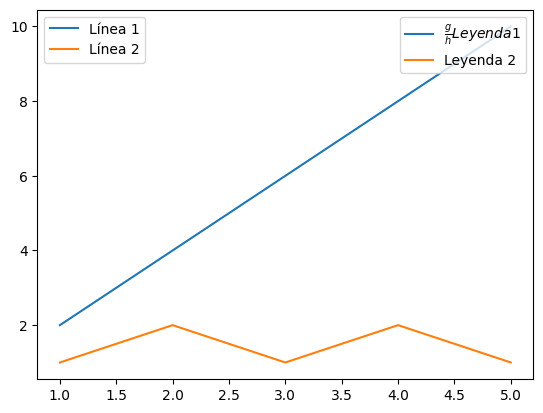

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 2, 1, 2, 1]

# Crear el gráfico de líneas
plt.plot(x, y1, label='Línea 1')
plt.plot(x, y2, label='Línea 2')

# Crear las leyendas
leyenda1 = plt.legend(loc='upper left')
leyenda2 = plt.legend([r'$\frac{g}{h}Leyenda 1$', 'Leyenda 2'], loc='upper right')  # Ejemplo de leyenda personalizada

# Agregar la leyenda2 al gráfico
plt.gca().add_artist(leyenda1)

# Mostrar el gráfico
plt.show()


c:\Users\admin\Desktop\Icaro\Codigo\Resumen\.venv\Lib\site-packages\labellines\core.py:216: UserWarning: The value at position 2 in `xvals` is outside the range of its associated line (xmin=2.9999999999999996, xmax=2.9999999999999996, xval=3.7920000000000003). Clipping it into the allowed range.
  warnings.warn(
c:\Users\admin\Desktop\Icaro\Codigo\Resumen\.venv\Lib\site-packages\labellines\core.py:216: UserWarning: The value at position 5 in `xvals` is outside the range of its associated line (xmin=1.9999999999999998, xmax=1.9999999999999998, xval=4.188000000000001). Clipping it into the allowed range.
  warnings.warn(
c:\Users\admin\Desktop\Icaro\Codigo\Resumen\.venv\Lib\site-packages\labellines\core.py:216: UserWarning: The value at position 8 in `xvals` is outside the range of its associated line (xmin=3.9999999999999996, xmax=3.9999999999999996, xval=4.584). Clipping it into the allowed range.
  warnings.warn(


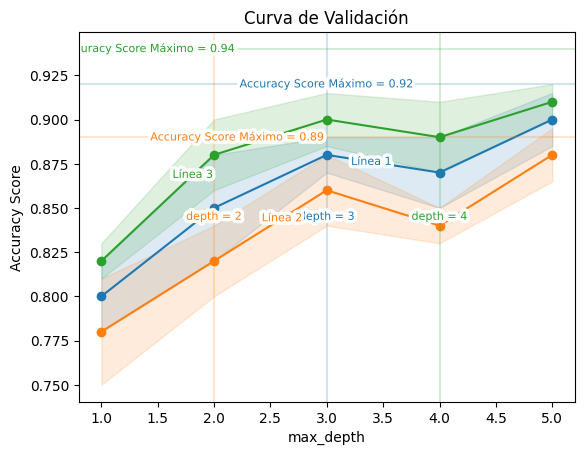

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from labellines import labelLines,labelLine

# Simulación de datos
depths_values = np.array([1, 2, 3, 4, 5])
ac_values = np.array([[0.8, 0.85, 0.88, 0.87, 0.9], [0.78, 0.82, 0.86, 0.84, 0.88], [0.82, 0.88, 0.9, 0.89, 0.91]])
sd_values = np.array([[0.02, 0.03, 0.01, 0.02, 0.015], [0.03, 0.02, 0.02, 0.01, 0.015], [0.01, 0.02, 0.015, 0.02, 0.01]])
acm = np.array([0.92, 0.89, 0.94])
depthm = np.array([3, 2, 4])

# Crear los gráficos de líneas
for i in range(3):
    plt.plot(depths_values, ac_values[i], color=f'C{i}', marker='o', label=f'Línea {i + 1}')
    plt.fill_between(depths_values, ac_values[i] - sd_values[i], ac_values[i] + sd_values[i], alpha=0.15, color=f'C{i}')
    plt.axhline(y=acm[i], color=f'C{i}', linestyle='-', label=f'Accuracy Score Máximo = {acm[i]}', alpha=0.2)
    plt.axvline(x=depthm[i], color=f'C{i}', linestyle='-', label=f'depth = {depthm[i]}', alpha=0.2)

# Configuraciones adicionales
plt.title("Curva de Validación")
plt.xlabel("max_depth")
plt.ylabel("Accuracy Score")

# Etiquetar líneas de manera personalizada usando label_lines
labelLines(plt.gca().getpl, align=False, fontsize=8)

# Mostrar el gráfico
plt.show()

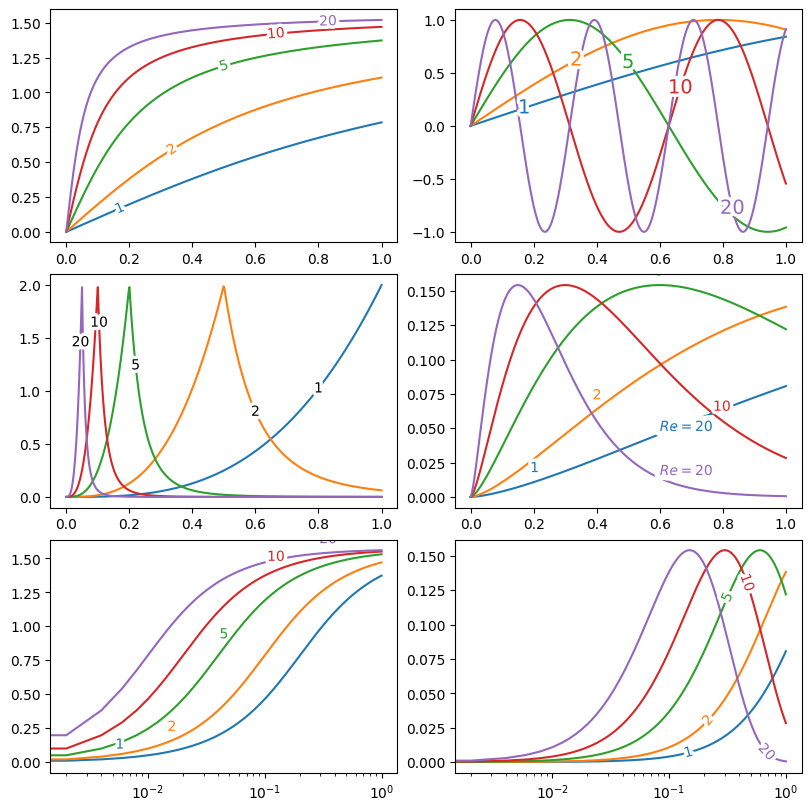

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2, loglaplace

from labellines import labelLine, labelLines

X = np.linspace(0, 1, 500)
A = [1, 2, 5, 10, 20]
funcs = [np.arctan, np.sin, loglaplace(4).pdf, chi2(5).pdf]

fig, axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(8, 8))

axes = axes.flatten()

ax = axes[0]
for a in A:
    ax.plot(X, np.arctan(a * X), label=str(a))

labelLines(ax.get_lines(), zorder=2.5)

ax = axes[1]
for a in A:
    ax.plot(X, np.sin(a * X), label=str(a))

labelLines(ax.get_lines(), align=False, fontsize=14)

ax = axes[2]
for a in A:
    ax.plot(X, loglaplace(4).pdf(a * X), label=str(a))

xvals = [0.8, 0.6, 0.22, 0.104, 0.045]
labelLines(ax.get_lines(), align=False, xvals=xvals, color="k")

ax = axes[3]
for a in A:
    ax.plot(X, chi2(5).pdf(a * X), label=str(a))

lines = ax.get_lines()
l1 = lines[-1]
labelLine(
    l1,
    0.6,
    label=r"$Re=${}".format(l1.get_label()),
    ha="left",
    va="bottom",
    align=False,
    backgroundcolor="none",
)
labelLines(lines[:-1], yoffsets=0.01, align=False, backgroundcolor="none")
labelLine(
    lines[0],
    0.6,
    label=r"$Re=${}".format(l1.get_label()),
    ha="left",
    va="bottom",
    align=False,
    backgroundcolor="none",
)

# labelLines also supports log-scaled x-axes
ax = axes[4]
for a in A:
    ax.semilogx(X, np.arctan(5 * a * X), label=str(a))

labelLines(ax.get_lines(), yoffsets=0.1, align=False,zorder=2.5)

ax = axes[5]
for a in A:
    ax.semilogx(X, chi2(5).pdf(a * X), label=str(a))

labelLines(ax.get_lines(), xvals=(0.1, 1), zorder=2.5)

plt.show()

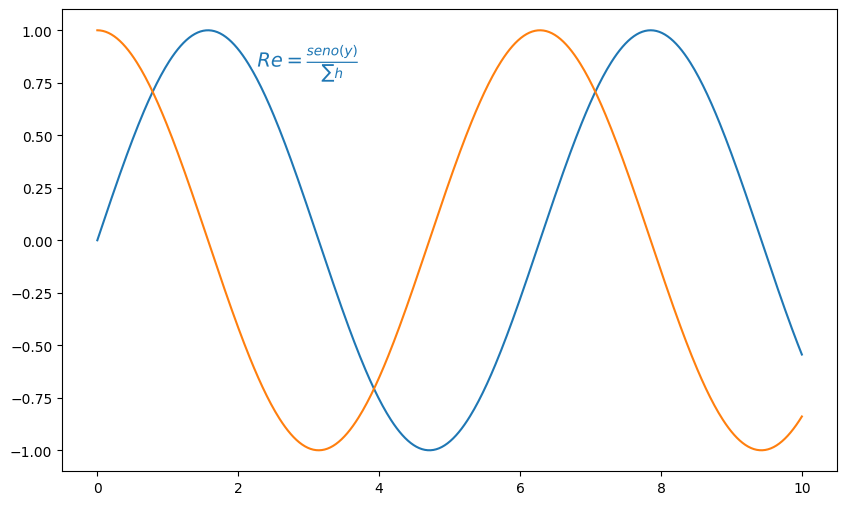

Line2D(seno)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2, loglaplace
from labellines import labelLine, labelLines

fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(10,6))
X = np.linspace(0, 10, 500)
y=np.sin(X)
z=np.cos(X)
axes.plot(X, y,label='seno')
axes.plot(X, z,label='coseno')
labelLine(axes.get_lines()[0],3,align=False,zorder=2.5,label=r"$Re=\frac{seno(y)}{\sum {h}}$",yoffset=0.7,fontsize=14)
plt.show()
print(axes.get_lines()[0])

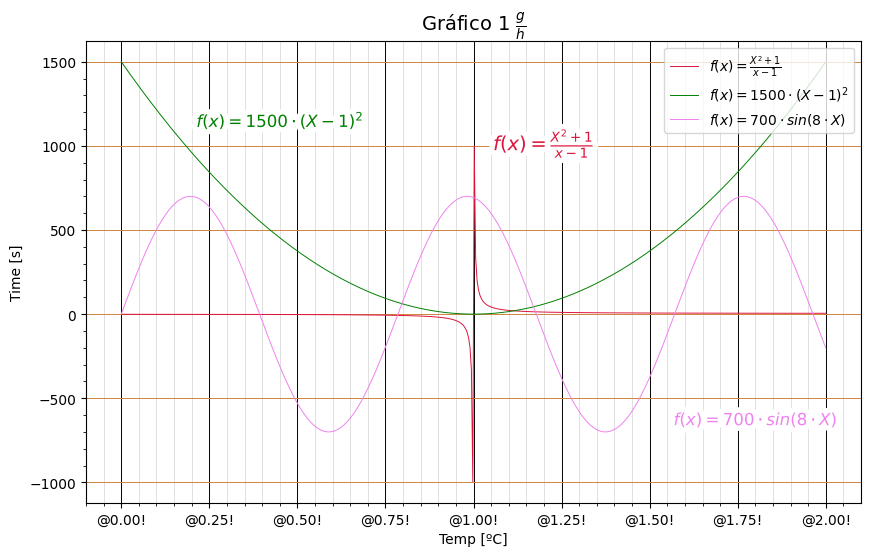

In [ ]:
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
from matplotlib.ticker import AutoMinorLocator

X=np.linspace(0,2,500)
y=(X**2+1)/(X-1)
y2=1500*(X-1)**2
y3=700*np.sin(8*X)

fig,ax=plt.subplots(figsize=(10,6))

ax.set_title(r'Gráfico 1 $\frac{g}{h}$',fontsize=14)
ax.set_xlabel('Temp [ºC]')
ax.set_ylabel('Time [s]')

# ax.set_yscale('log')

ax.set_xlim([0,2.1])

ax.set_yticks(np.arange(-1000,1600,500))
ax.set_yticks(np.arange(-1000,1600,100),minor=True)
xticks=np.arange(0,2.2,0.25)
xlabels = [f'@{x:1.2f}!' for x in xticks]
ax.set_xticks(xticks,labels=xlabels)
ax.set_xticks(np.arange(-0.1,2.1,0.05),minor=True)
# ax.grid('on')
ax.grid(True, which='major', axis='both', linestyle='-', linewidth=0.7, color='black',)
ax.grid(True, which='minor', axis='x', linestyle='-', linewidth=0.5, color='lightgrey',)
ax.tick_params(axis='y',grid_color='peru')


ax.plot(X,y,label='f1', color='crimson', linewidth=0.7)
ax.plot(X,y2,label='f2', color='green',linewidth=0.7)
ax.plot(X,y3,label='f3', color='violet',linewidth=0.7)

ax.legend([r'$f(x)=\frac{X^2+1}{x-1}$',r'$f(x)=1500\cdot(X-1)^2$',r'$f(x)=700 \cdot sin(8 \cdot X)$' ], loc='upper right')

lineas=ax.get_lines()

# labelLines(lineas,align=False)
labelLine(lineas[0],1.2,label=r'$f(x)=\frac{X^2+1}{x-1}$',fontsize=14,yoffset=1000,align=False)
labelLine(lineas[1],0.45,label=r'$f(x)=1500\cdot(X-1)^2$',fontsize=12,yoffset=700,align=False)
labelLine(lineas[2],1.8,label=r'$f(x)=700 \cdot sin(8 \cdot X)$',fontsize=12,yoffset=-1300,align=False)

plt.show()

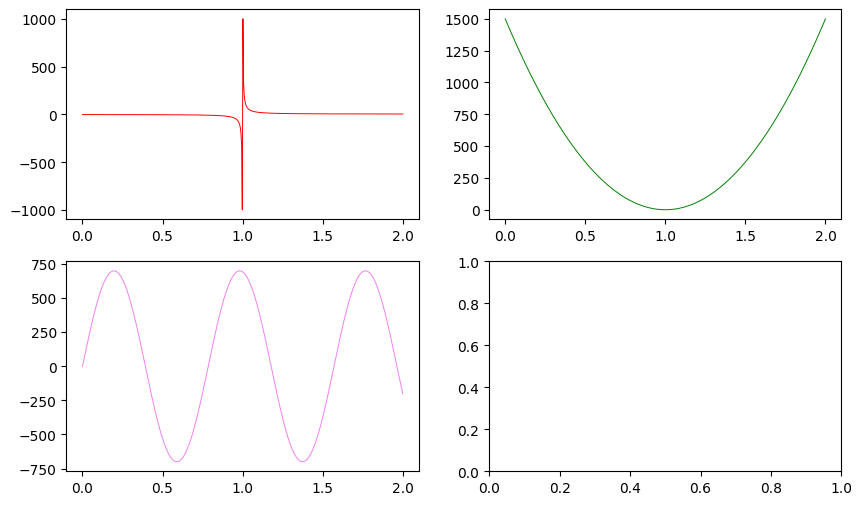

In [ ]:
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines

fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,6))
# axs.set_title(r'Gráfico 1 $\frac{g}{h}$')
axs=axs.flatten()

axs[0].plot(X,y,label='f1', color='red', linewidth=0.7)
axs[1].plot(X,y2,label='f2', color='green',linewidth=0.7)
axs[2].plot(X,y3,label='f3', color='violet',linewidth=0.7)

# ax.legend([r'$f(x)=\frac{X^2+1}{x-1}$',r'$f(x)=1500\cdot(X-1)^2$',r'$f(x)=700 \cdot sin(8 \cdot X)$' ], loc='upper right')

# lineas=ax.get_lines()

# # labelLines(lineas,align=False)
# labelLine(lineas[0],1.2,label=r'$f(x)=\frac{X^2+1}{x-1}$',fontsize=14,yoffset=1000,align=False)
# labelLine(lineas[1],0.45,label=r'$f(x)=1500\cdot(X-1)^2$',fontsize=12,yoffset=700,align=False)
# labelLine(lineas[2],1.8,label=r'$f(x)=700 \cdot sin(8 \cdot X)$',fontsize=12,yoffset=-1300,align=False)

plt.show()

In [ ]:
from bokeh.plotting import figure , show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
output_notebook()

p=figure(title='Gráficos',x_axis_label='x',y_axis_label='y', width=800 ,height=500, align='center')
p.title.align = "center"

# Agregar círculos a los puntos
p.circle(X,y, size=8, fill_color='white', line_color='blue', legend_label='Puntos')
p.circle(X,y2, size=8, fill_color='white', line_color='blue', legend_label='Puntos')

p.line(X,y, legend_label= r"$$f(x)=\frac{X^2+1}{x-1}$$", line_width=2)
p.line(X,y2, legend_label= r'$$f(x)=1500\cdot(X-1)^2$$', line_width=2 , color='red')

# Agregar el HoverTool
hover = HoverTool(tooltips=[('Coordenadas', '(@x, @y)')])
p.add_tools(hover)

show(p)

Loading BokehJS ...

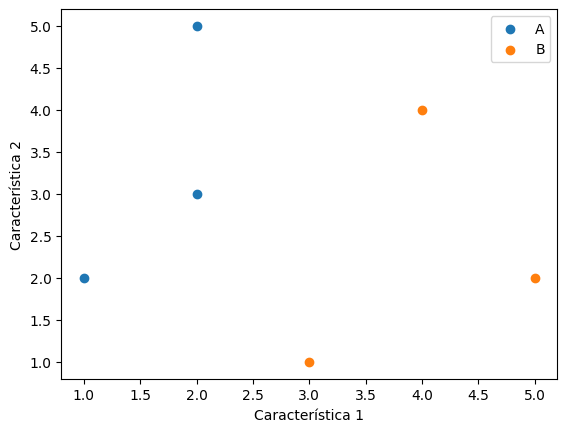

In [ ]:
import matplotlib.pyplot as plt

data = {
    'A': [(1, 2), (2, 3), (2, 5)],
    'B': [(3, 1), (4, 4), (5, 2)]
}

# Graficar los puntos
for label, points in data.items():
    x, y = zip(*points)
    plt.scatter(x, y, label=label)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

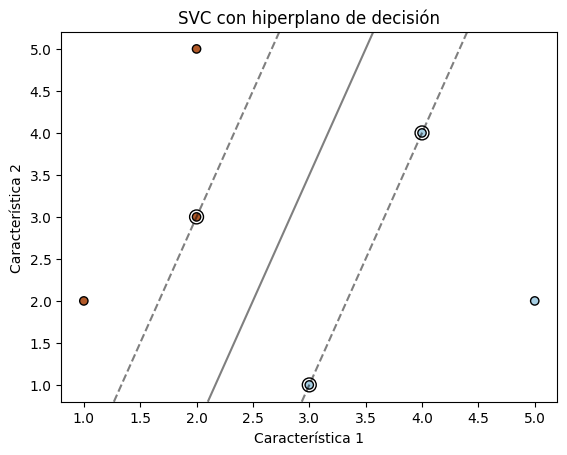

In [ ]:
from sklearn.svm import SVC
import numpy as np

# Datos de entrada
X = np.array([(1, 2), (2, 3), (2, 5), (3, 1), (4, 4), (5, 2)])
y = np.array([1, 1, 1, -1, -1, -1])

# Crear y entrenar el modelo SVC
svc_model = SVC(kernel='linear', C=7)
svc_model.fit(X, y)

# Coeficientes y término de sesgo del hiperplano
w1, w2 = svc_model.coef_[0]
b = svc_model.intercept_[0]

# Graficar los puntos y el hiperplano
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear grid para evaluar la función de decisión
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svc_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Graficar líneas de niveles y puntos de decisión
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

# Resaltar los vectores de soporte
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('SVC con hiperplano de decisión')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Usar np.ravel con un DataFrame de Pandas
flattened_df = df.to_numpy().flatten()

# Modificar la nueva vista (o copia) creada por np.ravel
flattened_df[0] = 100

# Imprimir el DataFrame original
print(df)
# Salida: 
#    A  B
# 0  1  4
# 1  2  5
# 2  3  6

print(type(df.to_numpy().flatten()),type(np.ravel(df)))

   A  B
0  1  4
1  2  5
2  3  6
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
a=np.arange(1,10).reshape(3,3)
b=np.ravel(a)
b[0]=100
a

array([[100,   2,   3],
       [  4,   5,   6],
       [  7,   8,   9]])

In [ ]:
df = pd._testing.makeMixedDataFrame()
df.info()
print(dir(pd._testing))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       5 non-null      float64       
 1   B       5 non-null      float64       
 2   C       5 non-null      object        
 3   D       5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 292.0+ bytes
['ALL_FLOAT_DTYPES', 'ALL_INT_DTYPES', 'ALL_INT_EA_DTYPES', 'ALL_INT_NUMPY_DTYPES', 'ALL_INT_PYARROW_DTYPES_STR_REPR', 'ALL_NUMERIC_DTYPES', 'ALL_NUMPY_DTYPES', 'ALL_PYARROW_DTYPES', 'ALL_REAL_DTYPES', 'ALL_REAL_EXTENSION_DTYPES', 'ALL_REAL_NUMPY_DTYPES', 'ArrowDtype', 'BOOL_DTYPES', 'BYTES_DTYPES', 'BaseMaskedArray', 'COMPLEX_DTYPES', 'Callable', 'Categorical', 'CategoricalIndex', 'ContextManager', 'Counter', 'DATETIME64_DTYPES', 'DataFrame', 'DatetimeIndex', 'Decimal', 'EMPTY_STRING_PATTERN', 'ENDIAN', 'ExtensionArray', 'FLOAT_EA_DTYPES', 'FLOAT_NUMPY_

In [ ]:
df=pd._testing.makeDataFrame()
df.head()

,A,B,C,D
ZqgszYBfuL,0.125730,0.345584,0.189053,2.040919
YT9l2dIrmO,-0.132105,0.821618,-0.522748,-2.555665
sIqjUAQP6A,0.640423,0.330437,-0.413064,0.418099
nN571Qxycl,0.104900,-1.303157,-2.441467,-0.567770
uvJFQ32W8t,-0.535669,0.905356,1.799707,-0.452649


In [ ]:
pd._testing.makeDataFrame?

Signature: pd._testing.makeDataFrame() -> 'DataFrame'
Docstring: <no docstring>
File:      c:\users\admin\desktop\icaro\codigo\resumen\.venv\lib\site-packages\pandas\_testing\__init__.py
Type:      function

In [ ]:

import pandas as pd
import numpy as np
from itertools import cycle
def generate_fake_dataframe(size, cols, col_names = None, intervals = None, seed = None):
    
    categories_dict = {'animals': ['cow', 'rabbit', 'duck', 'shrimp', 'pig', 'goat', 'crab', 'deer', 'bee', 'sheep', 'fish', 'turkey', 'dove', 'chicken', 'horse'],
                       'names'  : ['James', 'Mary', 'Robert', 'Patricia', 'John', 'Jennifer', 'Michael', 'Linda', 'William', 'Elizabeth', 'Ahmed', 'Barbara', 'Richard', 'Susan', 'Salomon', 'Juan Luis'],
                       'cities' : ['Stockholm', 'Denver', 'Moscow', 'Marseille', 'Palermo', 'Tokyo', 'Lisbon', 'Oslo', 'Nairobi', 'Río de Janeiro', 'Berlin', 'Bogotá', 'Manila', 'Madrid', 'Milwaukee'],
                       'colors' : ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'pink', 'silver', 'gold', 'beige', 'brown', 'grey', 'black', 'white']
                      }
    default_intervals = {"i" : (0,10), "f" : (0,100), "c" : ("names", 5), "d" : ("2020-01-01","2020-12-31")}
    rng = np.random.default_rng(seed)

    first_c = default_intervals["c"][0]
    categories_names = cycle([first_c] + [c for c in categories_dict.keys() if c != first_c])
    default_intervals["c"] = (categories_names, default_intervals["c"][1])
    
    if isinstance(col_names,list):
        assert len(col_names) == len(cols), f"The fake DataFrame should have {len(cols)} columns but col_names is a list with {len(col_names)} elements"
    elif col_names is None:
        suffix = {"c" : "cat", "i" : "int", "f" : "float", "d" : "date"}
        col_names = [f"column_{str(i)}_{suffix.get(col)}" for i, col in enumerate(cols)]

    if isinstance(intervals,list):
        assert len(intervals) == len(cols), f"The fake DataFrame should have {len(cols)} columns but intervals is a list with {len(intervals)} elements"
    else:
        if isinstance(intervals,dict):
            assert len(set(intervals.keys()) - set(default_intervals.keys())) == 0, f"The intervals parameter has invalid keys"
            default_intervals.update(intervals)
        intervals = [default_intervals[col] for col in cols]
    df = pd.DataFrame()
    for col, col_name, interval in zip(cols, col_names, intervals):
        if interval is None:
            interval = default_intervals[col]
        assert (len(interval) == 2 and isinstance(interval, tuple)) or isinstance(interval, list), f"This interval {interval} is neither a tuple of two elements nor a list of strings."
        if col in ("i","f","d"):
            start, end = interval
        if col == "i":
            df[col_name] = rng.integers(start, end, size)
        elif col == "f":
            df[col_name] = rng.uniform(start, end, size)
        elif col == "c":
            if isinstance(interval, list):
                categories = np.array(interval)
            else:
                cat_family, length = interval
                if isinstance(cat_family, cycle):
                    cat_family = next(cat_family)
                assert cat_family in categories_dict.keys(), f"There are no samples for category '{cat_family}'. Consider passing a list of samples or use one of the available categories: {categories_dict.keys()}"
                categories = rng.choice(categories_dict[cat_family], length, replace = False, shuffle = True)
            df[col_name] = rng.choice(categories, size, shuffle = True)
        elif col == "d":
            df[col_name] = rng.choice(pd.date_range(start, end), size)
    return df  

generate_fake_dataframe(1000,'cififficcd')

,column_0_cat,column_1_int,column_2_float,column_3_int,column_4_float,column_5_float,column_6_int,column_7_cat,column_8_cat,column_9_date
0,Mary,0,78.454891,1,98.528667,27.731077,8,crab,Denver,2020-11-08
1,James,3,45.964103,3,23.409672,88.196345,0,turkey,Río de Janeiro,2020-06-19
2,James,4,31.496566,6,14.322638,93.497152,7,sheep,Moscow,2020-12-08
3,Mary,7,23.780789,4,30.791826,6.469601,2,turkey,Tokyo,2020-06-18
4,Elizabeth,2,51.305763,8,61.927891,88.077612,0,sheep,Moscow,2020-06-10
...,...,...,...,...,...,...,...,...,...,...
995,Elizabeth,9,63.535555,7,93.748978,73.910115,5,duck,Moscow,2020-10-07
996,James,3,11.825658,5,2.218691,42.360984,3,sheep,Moscow,2020-05-02
997,Mary,5,92.653855,5,26.872129,27.121455,0,goat,Río de Janeiro,2020-04-13
998,Elizabeth,6,20.914861,7,70.433115,7.212241,3,duck,Denver,2020-04-10


In [ ]:
import scipy.stats as stats

def generar_distribucion_normal(tamano, media=0, desviacion_estandar=1, intervalo=(float('-inf'), float('inf')),
                                porcentaje_nans=0, seed=None):
    np.random.seed(seed) if seed is not None else None  # Establecer semilla si se proporciona

    # Calcula cantidad de NaNs a introducir
    cantidad_nans = int(porcentaje_nans * tamano / 100)
    tamano=tamano-cantidad_nans

    # Generar distribución normal
    distribucion = np.random.normal(loc=media, scale=desviacion_estandar, size=tamano)

    # Ajustar valores fuera del intervalo
    distribucion = np.clip(distribucion, intervalo[0], intervalo[1])

    # Introducir NaNs según el porcentaje especificado
    distribucion = np.concatenate([distribucion, np.full(cantidad_nans, np.nan)])
    
    # Mezclar los elementos
    np.random.shuffle(distribucion)

    return distribucion

# Ejemplo de uso:
tamano_esperado = 100
media_esperada = 5
desviacion_esperada = 2
intervalo_esperado = (0, 10)
porcentaje_nans_esperado = 5
semilla_esperada = 7

datos_generados = generar_distribucion_normal(
    tamano=tamano_esperado,
    media=media_esperada,
    desviacion_estandar=desviacion_esperada,
    intervalo=intervalo_esperado,
    porcentaje_nans=porcentaje_nans_esperado,
    seed=semilla_esperada
)
datos_generados

array([6.35325798, 4.22572011, 4.39961253, 6.01059875, 4.80077874,
       3.51489295, 5.06564033, 3.81846036, 4.90922794, 2.89996638,
       4.99821923, 3.42215394, 8.30139938, 8.53232176, 8.00663704,
       3.15291069, 2.61281616, 5.24776181, 7.92395125, 5.81503257,
       9.05814444, 4.57453407, 1.94695094, 5.66394843, 4.26236306,
       5.21729674, 9.49519011, 4.43472953, 4.18954429, 8.82403772,
       1.18726024, 3.22028628, 6.09749024, 4.16705136, 5.50515547,
       4.6400272 ,        nan, 6.33883639, 4.65690348, 4.84867308,
       5.30867107, 4.97551563, 6.78870461, 4.61428908, 5.7662437 ,
       2.13007307, 6.00324825, 4.3411725 , 1.44397429, 8.38105141,
              nan, 3.95079076, 1.49055139,        nan,        nan,
       4.7352456 , 5.47460369, 1.58332159, 7.99527823, 2.59156031,
       2.64003581, 6.30941141, 7.03531601, 3.65270963, 0.4233698 ,
       5.20286797, 3.74914205, 4.8104491 , 4.23315375, 8.05915927,
       2.0986426 , 5.53882326, 4.60794538, 7.14494026, 4.06812

In [ ]:
import numpy as np
from scipy.stats import norm

def generar_distribucion_normal(tamano, media=0, desviacion_estandar=1, intervalo=(float('-inf'), float('inf')),
                                porcentaje_nans=0, kurtosis=0, forma=1, mediana=None, moda=None, seed=None):
    np.random.seed(seed) if seed is not None else None  # Establecer semilla si se proporciona

    # Calcula cantidad de NaNs a introducir
    cantidad_nans = int(porcentaje_nans * tamano / 100)
    tamano = tamano - cantidad_nans

    # Generar distribución normal
    distribucion = np.random.normal(loc=media, scale=desviacion_estandar, size=tamano)

    # Aplicar kurtosis y forma
    distribucion = distribucion * forma + kurtosis

    # Ajustar valores fuera del intervalo
    distribucion = np.clip(distribucion, intervalo[0], intervalo[1])

    # Ajustar mediana y moda si se proporcionan
    if mediana is not None:
        distribucion = distribucion - np.median(distribucion) + mediana

    if moda is not None:
        moda_actual = norm.ppf(np.mean(norm.cdf(distribucion)))
        distribucion = distribucion - moda_actual + moda

    # Introducir NaNs según el porcentaje especificado
    distribucion = np.concatenate([distribucion, np.full(cantidad_nans, np.nan)])

    # Mezclar los elementos
    np.random.shuffle(distribucion)

    return distribucion

# Ejemplo de uso
datos_generados = generar_distribucion_normal(tamano=1000, media=5, desviacion_estandar=2, kurtosis=0, forma=1,
                                           mediana=None, moda=7, porcentaje_nans=5, seed=42)

In [ ]:
import numpy as np
from scipy.stats import norm

def generar_distribucion_normal(tamano, media=0, desviacion_estandar=1, intervalo=(float('-inf'), float('inf')),
                                porcentaje_nans=0, kurtosis=0, forma=1, mediana=None, moda=None, seed=None):
    np.random.seed(seed) if seed is not None else None  # Establecer semilla si se proporciona

    # Generar distribución normal estándar
    distribucion = np.random.normal(loc=0, scale=1, size=tamano)

    # Aplicar kurtosis y forma
    distribucion = distribucion * forma + kurtosis

    # Transformar a una distribución normal específica
    distribucion = distribucion * desviacion_estandar

    # Ajustar valores fuera del intervalo
    distribucion = np.clip(distribucion, intervalo[0], intervalo[1])

    # Ajustar mediana y moda si se proporcionan
    if mediana is not None:
        distribucion = distribucion - np.median(distribucion) + mediana

    if moda is not None:
        moda_actual = np.median(distribucion)  # Calcular la moda actual
        distribucion = distribucion - moda_actual + moda

    # Ajustar media
    media_actual = np.mean(distribucion)
    distribucion = distribucion - media_actual + media

    # Introducir NaNs según el porcentaje especificado
    cantidad_nans = int(porcentaje_nans * tamano / 100)
    distribucion = np.concatenate([distribucion, np.full(cantidad_nans, np.nan)])
    
    # Mezclar los elementos
    np.random.shuffle(distribucion)

    return distribucion

# Ejemplo de uso
datos_generados = generar_distribucion_normal(tamano=1000, media=5, desviacion_estandar=2, kurtosis=2, forma=1,
                                              mediana=6, moda=7, porcentaje_nans=5, seed=42)


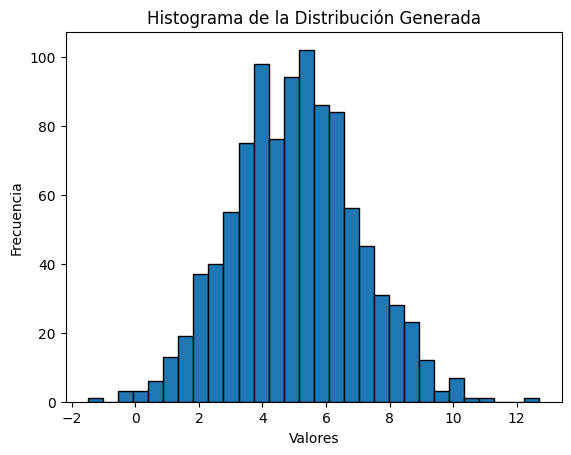

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearson3

def generar_distribucion_normal_generalizada(tamano, media,mediana, desviacion_estandar, seed=None):
    np.random.seed(seed) if seed is not None else None  # Establecer semilla si se proporciona

    # Calcular los parámetros de la distribución Pearson Tipo III
    asim=3*(media-mediana)/desviacion_estandar

    # Generar distribución Pearson Tipo III
    distribucion = pearson3.rvs(skew=asim, loc=media, scale=desviacion_estandar, size=tamano)

    # Graficar la distribución resultante
    plt.hist(distribucion, bins=30, edgecolor='black')
    plt.title('Histograma de la Distribución Generada')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.show()

    return distribucion

# Ejemplo de uso
tamano = 1000
media_objetivo = 5
desviacion_estandar_objetivo = 2
mediana = 5  # Puedes ajustar este valor según tus necesidades

datos_generados1 = generar_distribucion_normal_generalizada(tamano, media_objetivo,mediana, desviacion_estandar_objetivo, seed=42)


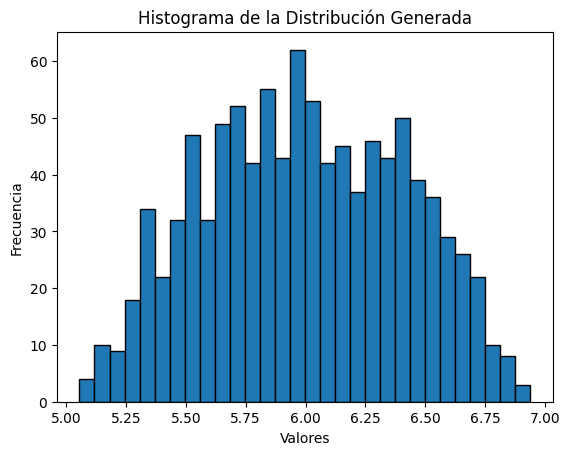

(5.995508201697442, 5.983679525401769, 0.4161132591020963, -0.8718019123065548)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import johnsonsb , kurtosis

def generar_distribucion_johnson_sb(tamano, media, mediana , dv, k, seed=None):
    np.random.seed(seed) if seed is not None else None  # Establecer semilla si se proporciona

    # Calcular los parámetros de la distribución Pearson Tipo III
    asim=3*(media-mediana)/dv

    # Generar datos con la distribución Johnson SB ajustada
    dj = johnsonsb.rvs(loc=media,scale=dv, a=asim, b=k,size=tamano, random_state=seed)

    # Graficar la distribución resultante
    plt.hist(dj, bins=30, edgecolor='black')
    plt.title('Histograma de la Distribución Generada')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.show()
    mean=dj.mean()
    median=np.median(dj)
    dev=dj.std()
    k=kurtosis(dj)

    return dj,mean,median,dev,k

# Ejemplo de uso
tamano = 1000
media_objetivo = 5
desviacion_estandar_objetivo =2
mediana = 5
curtosis_objetivo = 1

dj,mean,median,dev,k=generar_distribucion_johnson_sb(tamano, media_objetivo, mediana, desviacion_estandar_objetivo, curtosis_objetivo, seed=7)

mean,median,dev,k

In [ ]:
from scipy.stats import gennorm , skew
from scipy.stats import kurtosis
# np.median(datos_generados)
# datos_generados.mean()
datos_generados.std()
# asim=skew(datos_generados)
# kurtosis = (asim**2 + 1) / asim**2
# pd.Series(datos_generados).kurt()
# kurtosis,asim
# kurtosis(datos_generados)

1.9574524154947086

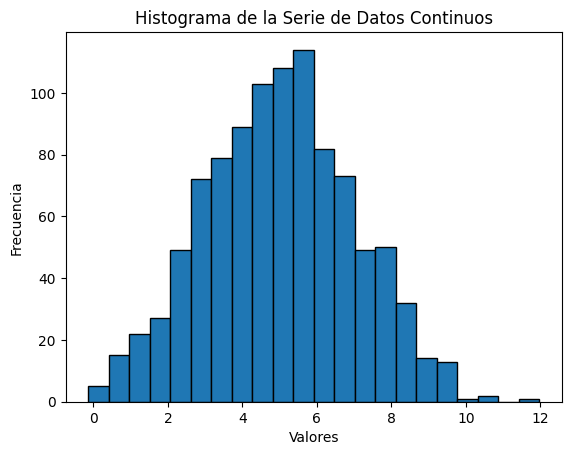

In [ ]:
# Eliminar valores nan
datos_generados = datos_generados[~np.isnan(datos_generados)]

# Calcular el ancho del bin utilizando la regla de Freedman-Diaconis
iqr = np.percentile(datos_generados, 75) - np.percentile(datos_generados, 25)
bin_width = 2 * iqr / np.power(len(datos_generados), 1/3)

# Graficar el histograma con el bin adecuado
plt.hist(datos_generados, bins=np.arange(min(datos_generados), max(datos_generados) + bin_width, bin_width), edgecolor='black')

# Personalizar el gráfico (opcional)
plt.title('Histograma de la Serie de Datos Continuos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


In [ ]:
# datos_generados.mean()
# datos_generados.std()
np.median(datos_generados)

5.047232388427544

In [ ]:
import numpy as np
from scipy.stats import gennorm , skew
import matplotlib.pyplot as plt

def generar_distribucion_especifica(tamano, media, mediana, moda, kurtosis, forma, seed=None):
    np.random.seed(seed) if seed is not None else None  # Establecer semilla si se proporciona

    # Ajustar los parámetros de la distribución normal generalizada
    desviacion_estandar = np.sqrt(kurtosis / forma)
    loc = media - gennorm.ppf((moda - mediana) / (2 * desviacion_estandar), forma)

    # Generar distribución normal generalizada
    distribucion = gennorm.rvs(forma, loc=loc, scale=desviacion_estandar, size=tamano)

    return distribucion

# Ejemplo de uso
tamano = 1000
media_objetivo = 5
mediana_objetivo = 6
moda_objetivo = 7
kurtosis_objetivo = -1
forma_objetivo = 4  # Puedes ajustar este valor según tus necesidades

datos_generados = generar_distribucion_especifica(tamano, media_objetivo, mediana_objetivo,
                                                  moda_objetivo, kurtosis_objetivo, forma_objetivo, seed=42)

# Verificar estadísticas de la distribución generada
print("Media:", np.mean(datos_generados))
print("Mediana:", np.median(datos_generados))
print("Moda:", moda_objetivo)
print("Kurtosis:", kurtosis_objetivo)
print("Asimetría:", skew(datos_generados))

# Graficar histograma
plt.hist(datos_generados, bins=30, edgecolor='black')
plt.title('Histograma de la Distribución Generada')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()




In [ ]:
import numpy as np
from scipy.stats import johnsonsu
from scipy.optimize import minimize
from scipy.stats import kurtosis


def ajustar_parametros_distribucion(mean, median, dev, k, tamano, seed=None):
    # Función objetivo para la optimización
    def objetivo(parametros):
        l, d, a, b = parametros
        dj = johnsonsu.rvs(loc=l, scale=d, a=a, b=b, size=tamano, random_state=seed)
        error =np.sum((dj.mean() - mean)**2 + (np.median(dj) - median)**2 + (dj.std() - dev)**2 + (kurtosis(dj) - k)**2)
        return error

    # Supongamos valores iniciales para los parámetros
    valores_iniciales = np.array([0, 1, 1, 1])

    # Realizar la optimización
    resultado_optimizacion = minimize(objetivo, valores_iniciales, method='L-BFGS-B')

    # Obtener los parámetros ajustados
    l_opt, d_opt, a_opt, k_opt = resultado_optimizacion.x

    return l_opt, d_opt, a_opt, k_opt

# Ejemplo de uso
tamano = 1000
mean_objetivo = 5
median_objetivo = 5
dev_objetivo = 2
k_objetivo = -1  # Puedes ajustar este valor según tus necesidades

l_opt, d_opt, a_opt, k_opt = ajustar_parametros_distribucion(mean_objetivo, median_objetivo, dev_objetivo, k_objetivo, tamano, seed=42)
print("Parámetros óptimos:", l_opt, d_opt, a_opt, k_opt)

# Generar la distribución con los parámetros ajustados
dj_ajustada = johnsonsu.rvs(loc=l_opt, scale=d_opt, a=a_opt, b=k_opt, size=tamano, random_state=42)



In [ ]:
import numpy as np
from scipy.stats import johnsonsu,johnsonsb
from scipy.optimize import minimize
from scipy.stats import kurtosis

def ajustar_parametros_distribucion(mean, median, dev, k, tamano, seed=None):
    # Función objetivo para la optimización
    def objetivo(parametros):
        l, d, a, b = parametros
        dj = johnsonsu.rvs(loc=l, scale=d, a=a, b=b, size=tamano, random_state=seed)
        error = np.sum((dj.mean() - mean)**2 + (np.median(dj) - median)**2 + (dj.std() - dev)**2 + (kurtosis(dj) - k)**2)
        return error

    # Supongamos valores iniciales para los parámetros
    valores_iniciales = np.array([0, 1, 1, 1])

    # Realizar la optimización con restricciones
    resultado_optimizacion = minimize(objetivo, valores_iniciales, method='L-BFGS-B')

    # Obtener los parámetros ajustados
    l_opt, d_opt, a_opt, k_opt = resultado_optimizacion.x

    return l_opt, d_opt, a_opt, k_opt

# Ejemplo de uso
tamano = 1000
mean_objetivo = 5
median_objetivo = 6
dev_objetivo = 2
k_objetivo = 0  # Puedes ajustar este valor según tus necesidades

l_opt, d_opt, a_opt, k_opt = ajustar_parametros_distribucion(mean_objetivo, median_objetivo, dev_objetivo, k_objetivo, tamano, seed=42)
print("Parámetros óptimos:", l_opt, d_opt, a_opt, k_opt)

# Generar la distribución con los parámetros ajustados
dj_ajustada = johnsonsu.rvs(loc=l_opt, scale=d_opt, a=a_opt, b=k_opt, size=tamano, random_state=42)




Parámetros óptimos: 13.447466452256872 0.17422719060141947 17.74912240261533 3.9508606721030075


In [ ]:
mean=dj_ajustada.mean()
median=np.median(dj_ajustada)
dev=dj_ajustada.std()
k=kurtosis(dj_ajustada)
mean,median,dev,k

(5.350620917611537,
 5.6497700196244125,
 2.0510442469015464,
 0.08507924226999064)

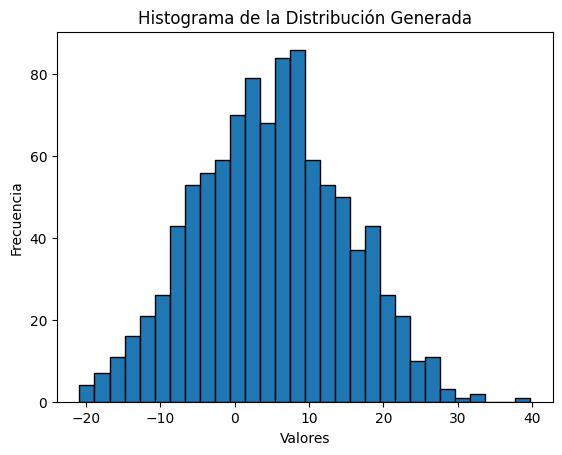

In [ ]:
# Graficar histograma
plt.hist(dj_ajustada, bins=30, edgecolor='black')
plt.title('Histograma de la Distribución Generada')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import pearson3
from scipy.optimize import minimize
from scipy.stats import kurtosis

def ajustar_parametros_pearson3(mean, median, dev, k, tamano, seed=None):
    # Función objetivo para la optimización
    def objetivo(parametros):
        loc, scale, gamma = parametros
        pearson3_sample = pearson3.rvs(loc=loc, scale=scale, skew=gamma, size=tamano, random_state=seed)
        error = np.sum((np.mean(pearson3_sample) - mean)**2 + (np.median(pearson3_sample) - median)**2 +
                       (np.std(pearson3_sample) - dev)**2 + (kurtosis(pearson3_sample) - k)**2)
        return error

    # Supongamos valores iniciales para los parámetros
    valores_iniciales = np.array([0, 1, 0])

    # Realizar la optimización con restricciones
    resultado_optimizacion = minimize(objetivo, valores_iniciales, method='L-BFGS-B')

    # Obtener los parámetros ajustados
    loc_opt, scale_opt, gamma_opt = resultado_optimizacion.x

    return loc_opt, scale_opt, gamma_opt

# Ejemplo de uso
tamano = 1000
mean_objetivo = 5
median_objetivo = 5
dev_objetivo = 2
k_objetivo = 1  # Puedes ajustar este valor según tus necesidades

loc_opt, scale_opt, gamma_opt = ajustar_parametros_pearson3(mean_objetivo, median_objetivo, dev_objetivo, k_objetivo, tamano, seed=42)
print("Parámetros óptimos:", loc_opt, scale_opt, gamma_opt)

# Generar la distribución con los parámetros ajustados
pearson3_ajustada = pearson3.rvs(loc=loc_opt, scale=scale_opt, skew=gamma_opt, size=tamano, random_state=42)



Parámetros óptimos: 4.954397986395414 2.043434267175145 0.0


In [ ]:
mean=dj_ajustada.mean()
median=np.median(dj_ajustada)
dev=dj_ajustada.std()
k=kurtosis(dj_ajustada)
mean,median,dev,k

(5.00000024501483,
 4.999998528016576,
 1.9999993133412688,
 3.328671502877967e-07)

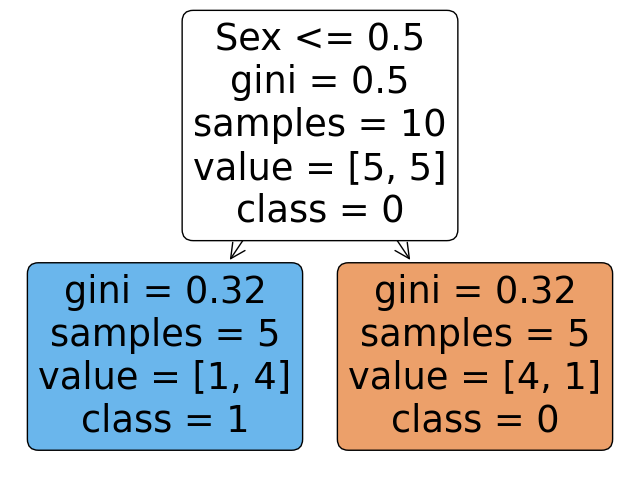

Impureza de Gini para "Sex": 0.31999999999999995


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear el DataFrame
data = {
    'Survived': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Sex': [1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
    'Color': [0,1, 0, 1, 0, 1, 0, 1, 1, 1]
}
df = pd.DataFrame(data)

# Seleccionar variables predictoras y objetivo
X = df[['Sex']]
y = df['Survived']

# Crear un clasificador de árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=1)  # Limitar la profundidad a 1 para visualización
tree_clf.fit(X, y)

# Graficar el árbol
plt.figure(figsize=(8, 6))
plot_tree(tree_clf, feature_names=['Sex'], class_names=['0', '1'], filled=True, rounded=True)
plt.show()

igs = tree_clf.tree_.impurity
sps = tree_clf.tree_.n_node_samples
iG=(sps[1]*igs[1]+sps[2]*igs[2])/(sps[1]+sps[2])
print(f'Impureza de Gini para "Sex": {iG}')

In [ ]:
female_0=(df[df['Sex'] == 0][['Survived']]==0).sum().values[0]
female_1=(df[df['Sex'] == 0][['Survived']]==1).sum().values[0]
Nfemale=female_0+female_1
ig=1-((female_0/Nfemale)**2+(female_1/Nfemale)**2)
ig

0.31999999999999984

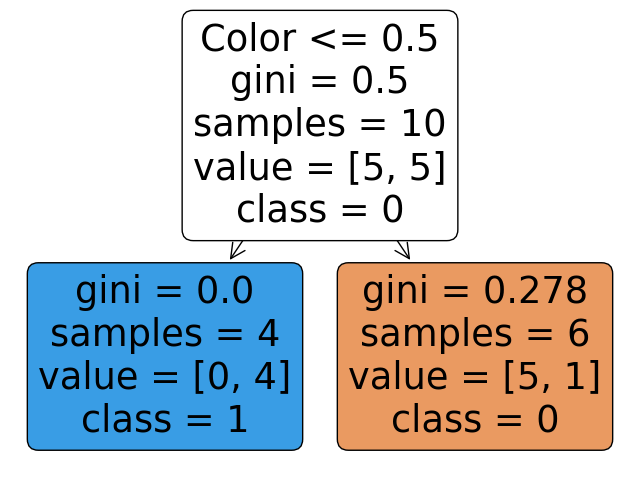

Impureza de Gini para "Color": 0.16666666666666669


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear el DataFrame
data = {
    'Survived': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Sex': [1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
    'Color': [0,1, 0, 1, 0, 1, 0, 1, 1, 1]
}
df = pd.DataFrame(data)

# Seleccionar variables predictoras y objetivo
X = df[['Color']]
y = df['Survived']

# Crear un clasificador de árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=1)  # Limitar la profundidad a 1 para visualización
tree_clf.fit(X, y)

# Graficar el árbol
plt.figure(figsize=(8, 6))
plot_tree(tree_clf, feature_names=['Color'], class_names=['0', '1'], filled=True, rounded=True)
plt.show()

igs = tree_clf.tree_.impurity
sps = tree_clf.tree_.n_node_samples
iG=(sps[1]*igs[1]+sps[2]*igs[2])/(sps[1]+sps[2])
print(f'Impureza de Gini para "Color": {iG}')

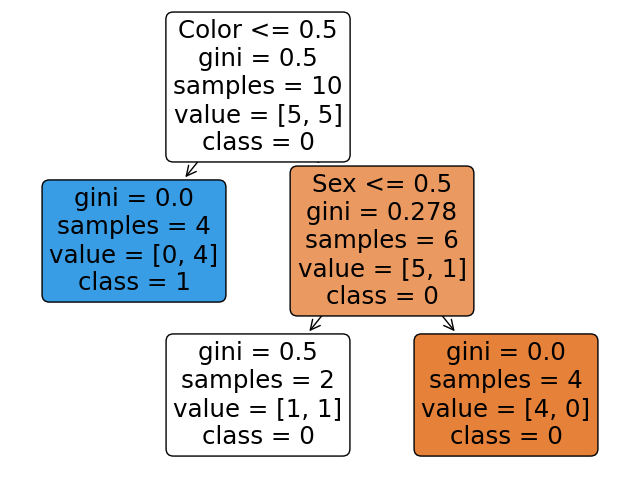

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear el DataFrame
data = {
    'Survived': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Sex': [1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
    'Color': [0,1, 0, 1, 0, 1, 0, 1, 1, 1]
}
df = pd.DataFrame(data)

# Seleccionar variables predictoras y objetivo
X = df[['Sex','Color']]
y = df['Survived']

# Crear un clasificador de árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=5)  # Limitar la profundidad a 1 para visualización
tree_clf.fit(X, y)

# Graficar el árbol
plt.figure(figsize=(8, 6))
plot_tree(tree_clf, feature_names=['Sex','Color'], class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

a=mean_squared_error
a.__name__


'mean_squared_error'

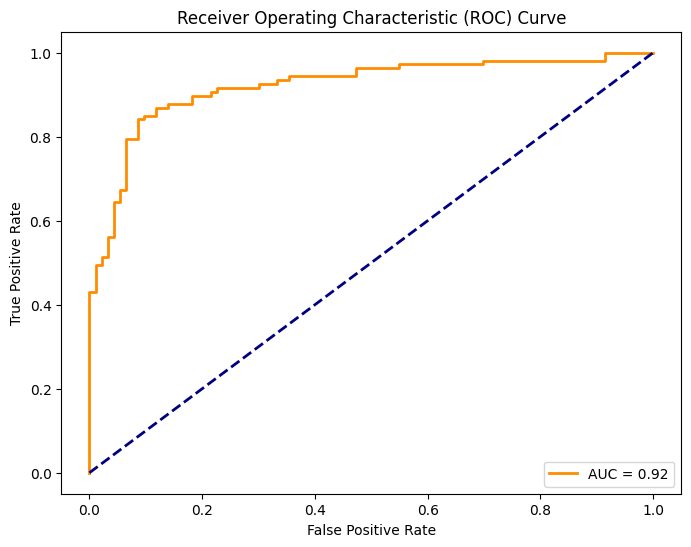

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener probabilidades predichas para la clase positiva
y_scores = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
class Prueba():
    def imprimir(self):
        print ('hola')

a=Prueba()
a.imprimir()

hola


In [ ]:
a=np.array([1,2,3,4,5]).astype(float)
a= np.insert(a, 0, np.inf)
a



array([inf,  1.,  2.,  3.,  4.,  5.])

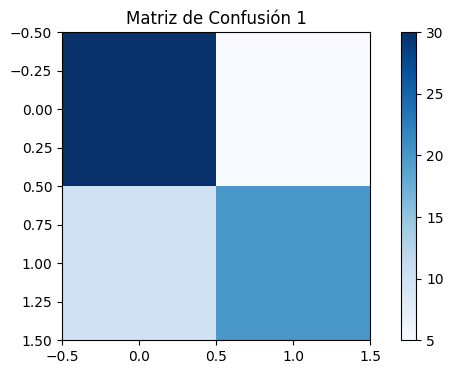

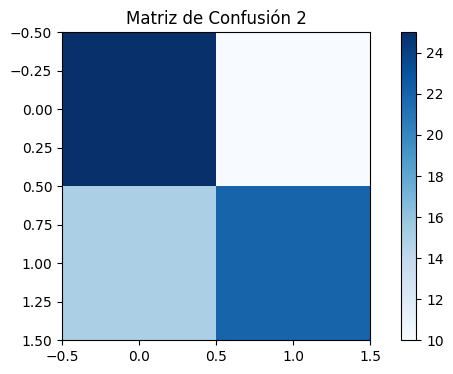

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes dos matrices de confusión llamadas matrix1 y matrix2
matrix1 = np.array([[30, 5], [10, 20]])
matrix2 = np.array([[25, 10], [15, 22]])

# Crear la primera figura y mostrar la primera matriz de confusión
plt.figure(figsize=(8, 4))
plt.imshow(matrix1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión 1')
plt.colorbar()

# Crear la segunda figura y mostrar la segunda matriz de confusión al lado de la primera
plt.figure(figsize=(8, 4))
plt.imshow(matrix2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión 2')
plt.colorbar()

# Mostrar ambas figuras
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Crear un DataFrame de ejemplo
data = {
    'feature1': np.random.uniform(0, 2, 10),
    'feature2': np.random.uniform(0, 2, 10),
    'feature3': np.random.uniform(0, 2, 10),
    'y': np.random.choice([0, 1], size=10)
}

df = pd.DataFrame(data)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop(['y'],axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de árbol de decisión
tree_model = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_p = tree_model.predict(X_test)
y_pP = tree_model.predict_proba(X_test)

print(y_p,'\n')
print(y_pP,'\n')
print((y_pP[:,1]>0.5).astype(int))

[1 1] 

[[0.31 0.69]
 [0.22 0.78]] 

[1 1]


En lo que sigue, tener bien en claro, que tanto ***CountVectorizer*** como ***TdfidfVectorizer*** son clases ***"transformadores"***, es decir, se aplican a ***"X"***, (variables preditivas).  
Su objetivo es que, a partir de las ***"X"*** ***"textuales"*** obtener ***"X"*** ***"numéricas"*** ,en donde, cada número o elemento de esta nueva matriz represente, según ciertos criterios, la importancia de cada elemento textual de la ***X original*** en cada registro.   
Como resultado final se obtiene una matriz en donde las filas representan los registros y las columnas son cada uno de los elementos textuales únicos de la matriz original. 
  
     
Para entenderlo mejor, se expone un ejemplo simple, con un dataframe original con 3 registros textuales.   
En este caso no se incluye la variable objetivo ***"y"*** solo por claridad. Es decir en este caso df=X.  
  
Nota:   
Notar que tanto CountVectorizer como TfidfVectorizer no procesan Stop_words como "y", "el", etc.

In [25]:
# DataFrame de ejemplo X original.
data = {
    'Registros': [
        'Este es un ejemplo de texto de prueba',
        'Otro ejemplo similar al ejemplo anterior',
        'Y Otro ejemplo más corto'
    ]
}
X = pd.DataFrame(data)
display(X)

,Registros
0,Este es un ejemplo de texto de prueba
1,Otro ejemplo similar al ejemplo anterior
2,Y Otro ejemplo más corto


#### CountVectorizer
Convierte los "Registros" de "texto" en registros de recuentos de términos (elementos numéricos).   
Primero Crea el "corpus" un conjunto con todas las palabras o ngramas u objetos únicos de todos los documentos o registros.    
   
Y luego cuenta la cantidad de veces que aparece cada elemento del corpus en cada registro.  
    
El resultado final es una matriz cuyas columnas son los elementos únicos del corpus y sus filas son los registros, de modo que, cada elemento de la matriz indica, la cantidad de veces que aparece ese elemento (el del corpus) en el registro original.  

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia de CountVectorizer
vectorizer = CountVectorizer()

# Ajustar y transformar los datos de texto en una matriz numérica
matriz_numerica = vectorizer.fit_transform(X["Registros"])

# Convertir la matriz numérica a un DataFrame de Pandas
X_numerico = pd.DataFrame(matriz_numerica.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar el DataFrame numérico resultante
display(X)
display(X_numerico)

,Registros
0,Este es un ejemplo de texto de prueba
1,Otro ejemplo similar al ejemplo anterior
2,Y Otro ejemplo más corto


,al,anterior,corto,de,ejemplo,es,este,más,otro,prueba,similar,texto,un
0,0,0,0,2,1,1,1,0,0,1,0,1,1
1,1,1,0,0,2,0,0,0,1,0,1,0,0
2,0,0,1,0,1,0,0,1,1,0,0,0,0


#### TfidfVectorizer
Hace lo mismo, solo que los elemntos de la matriz devuelta, en vez de ser recuentos, son números calculados según:  
  
Si el parámetro smooth_idf=True (valor por defecto)
$$\text{TF-IDF}=N_t \cdot \Bigg(ln\Bigg[\frac{1+ND}{1+d(t)}\Bigg]+1\Bigg)$$
Ó si el parámetro smooth_idf=False
$$\text{TF-IDF}=N_t \cdot \Bigg(ln\Bigg[\frac{ND}{d(t)}\Bigg]+1\Bigg)$$

y finalmente "Normalizados" según:
$$\text{TF-IDF}_{norm}=\frac{\text{TF-IDF}}{\sqrt{\displaystyle\sum_{i=1}^{nd}(\text{TF-IDF}_i)^2}}$$
en donde:  
  
$N_t$ es el número de veces que aparece la palabra o elemento "$t$" en el registro o documento en cuestión.  
$ND$ es el número total de registros o documentos.  
$d(t)$ es el número de registros o documentos en los que aparece el elemento "$t$"  
$nd$ es el número de términos o elementos únicos en el registro o documento "$d$".

#### Ejemplo manual, para el primer registro  
'Registros': [  
        'Este es un ejemplo de texto de prueba',  
        'Otro ejemplo similar al ejemplo anterior',  
        'Y Otro ejemplo más corto'  
    ]  
  
$N_t$ = "este" aparece 1 vez en el primer registro.  
$ND$ = hay 3 registros.  
d("este")= "este" sólo aparece en el primer registro. = 1  
nd = cantidad de elementos ***únicos*** en el primer registro = 7    
  
  $$\text{TF-IDF}("este")=1 \cdot \Bigg(ln\Bigg[\frac{1+3}{1+1}\Bigg]+1\Bigg)=1.69314718$$

Lo mismo para "es" , "un" , "texto" , y "prueba"  
Luego para "ejemplo":  
$$\text{TF-IDF}("ejemplo")=1 \cdot \Bigg(ln\Bigg[\frac{1+3}{1+3}\Bigg]+1\Bigg)=1$$
y para "de":  
$$\text{TF-IDF}("de")=2 \cdot \Bigg(ln\Bigg[\frac{1+3}{1+1}\Bigg]+1\Bigg)=3.38629436$$
y la norma sería:  
$$\sqrt{\displaystyle\sum_{i=1}^{nd}(\text{TF-IDF}_i)^2}=\sqrt{5\cdot 1.69314718^2+1^2+3.38629436^2}=5.17694180$$
    
y por lo tanto los valores TDIDF ***Normalizados*** serán:  
$$\text{TF-IDF}("este")=\text{TF-IDF}("es")=\text{TF-IDF}("un")=\text{TF-IDF}("texto")=\text{TF-IDF}("prueba")=\frac{1.69314718}{5.17694180}=0.327055$$
$$\text{TF-IDF}("ejemplo")=\frac{1}{5.17694180}=0.19316423$$
$$\text{TF-IDF}("de")=\frac{3.38629436}{5.17694180}=0.65411096$$

In [27]:
import math
este=1*(math.log(2)+1)
ejemplo=1*(math.log(1)+1)
de=2*(math.log(2)+1)
norma=np.sqrt(5*este**2+ejemplo**2+de**2)

norma,este/norma,ejemplo/norma,de/norma

(5.176941797561842,
 0.32705547923242223,
 0.19316423462032448,
 0.6541109584648445)

Se verifica lo anterior con los resultados que devuelve ***TfidfVectorizer***

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inicializar el TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Aplicar el TfidfVectorizer a la columna 'texto'
tfidf_matrix = tfidf_vectorizer.fit_transform(X['Registros'])

# Crear un DataFrame a partir de la matriz TF-IDF
X_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df.index)

# Mostrar el DataFrame resultante
display(X)
display(X_tfidf)

,Registros
0,Este es un ejemplo de texto de prueba
1,Otro ejemplo similar al ejemplo anterior
2,Y Otro ejemplo más corto


,al,anterior,corto,de,ejemplo,es,este,más,otro,prueba,similar,texto,un
0,0.000000,0.000000,0.000000,0.654111,0.193164,0.327055,0.327055,0.000000,0.000000,0.327055,0.000000,0.327055,0.327055
1,0.448394,0.448394,0.000000,0.000000,0.529657,0.000000,0.000000,0.000000,0.341015,0.000000,0.448394,0.000000,0.000000
2,0.000000,0.000000,0.584483,0.000000,0.345205,0.000000,0.000000,0.584483,0.444514,0.000000,0.000000,0.000000,0.000000


In [15]:
import pandas as pd

# Datos de ejemplo
data = {'Marital_Status': ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],'Otra': ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone']}
df = pd.DataFrame(data)

print(df)
# Codificar las categorías de 'Marital_Status' usando OneHotEncoding en el mismo DataFrame
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=False, prefix='M',sparse=True)

# Resultado
print(df)

  Marital_Status      Otra
0         Single    Single
1       Together  Together
2        Married   Married
3       Divorced  Divorced
4          Widow     Widow
5          Alone     Alone
       Otra  M_Alone  M_Divorced  M_Married  M_Single  M_Together  M_Widow
0    Single    False       False      False      True       False    False
1  Together    False       False      False     False        True    False
2   Married    False       False       True     False       False    False
3  Divorced    False        True      False     False       False    False
4     Widow    False       False      False     False       False     True
5     Alone     True       False      False     False       False    False


In [16]:
from sklearn.cluster import KMeans
import pandas as pd

# Ejemplo de datos
data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Ajustar el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Obtener las etiquetas de los clusters asignados a cada muestra
df['Cluster'] = kmeans.labels_

# Resultado
print(df)

   Feature1  Feature2  Cluster
0         1        10        2
1         2        20        0
2         3        30        0
3         4        40        1
4         5        50        1


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# DataFrame de ejemplo
data = {
    'ID': [5524, 2174, 4141, 6182, 5324],
    'Education': ['Graduation', 'Master', 'Basic', '2 cycle', 'PhD'],
    'Marital_Status': ['Single', 'Widow', 'Together', 'Alone', 'Married'],
    'Income': [58138.0, 46344.0, 71613.0, 26646.0, 58293.0],
    'Kidhome': [0, 1, 0, 1, 1],
    'Teenhome': [0, 1, 0, 0, 0],
    'Recency': [58, 38, 26, 26, 94],
    'MntWines': [635, 11, 426, 11, 173],
    'MntFruits': [88, 1, 49, 4, 43],
    'MntMeatProducts': [546, 6, 127, 20, 118],
    'MntFishProducts': [172, 2, 111, 10, 46],
    'MntSweetProducts': [88, 1, 21, 3, 27],
    'NumWebPurchases': [8, 1, 8, 2, 5]
}
df = pd.DataFrame(data)

# Seleccionar las columnas numéricas y categóricas
numeric_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases']
categorical_columns = ['Education', 'Marital_Status']

# Preprocesamiento de datos
numeric_transformer = StandardScaler()
# Prefijos personalizados para cada columna categórica
prefixes = {'Education': 'Edu', 'Marital_Status': 'MS'}
categorical_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X = preprocessor.fit_transform(df)

# Obtener el nombre de las columnas después de la transformación
feature_names = numeric_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
feature_names=[prefixes[''] + name if name.startswith('Education') else 'MS_' + name for name in categorical_feature_names]
# # Crear un DataFrame con los datos transformados
# X_df = pd.DataFrame(X, columns=feature_names)

# # Mostrar el DataFrame
# display(X_df)

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumWebPurchases',
 'Education_2 cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Alone',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow']

In [26]:
lista = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases', 'Education_2 cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']

prefixs = {'Education':'Edu','Marital_Status':'MS'}

lista = [next((e.replace(key, value) for key, value in prefixs.items() if e.startswith(key)), e) for e in lista]

lista

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumWebPurchases',
 'Edu_2 cycle',
 'Edu_Basic',
 'Edu_Graduation',
 'Edu_Master',
 'Edu_PhD',
 'MS_Alone',
 'MS_Married',
 'MS_Single',
 'MS_Together',
 'MS_Widow']

In [6]:
diccionario.keys()

dict_keys(['Education', 'Marital_Status'])

In [15]:
lista = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases', 'Education_2 cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']

diccionario = {'Education':'Edu','Marital_Status':'MS'}

lista = [diccionario.get(item.split("_", 1)[0], item.split("_", 1)[0]) + "_" + item.split("_", 1)[1] if "_" in item else item for item in lista]

lista

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumWebPurchases',
 'Edu_2 cycle',
 'Edu_Basic',
 'Edu_Graduation',
 'Edu_Master',
 'Edu_PhD',
 'Marital_Status_Alone',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow']

In [5]:
import pandas as pd

# Ejemplo de datos
data = {
    'userId': [1, 1, 2, 2, 3],
    'movieId': [1, 2, 2, 3, 1],
    'rating': [4, 5, 3, 2, 1]
}
train = pd.DataFrame(data)

movieIds=train.movieId.unique()

# Llenar la matriz con las interacciones utilizando reindex
train_pivot = train.pivot(index='userId', columns='movieId', values='rating')
print(train_pivot)
interactions_matrix = train_pivot.fillna(0)

# Verificar la matriz de interacciones
print(interactions_matrix.dtypes)

movieId    1    2    3
userId                
1        4.0  5.0  NaN
2        NaN  3.0  2.0
3        1.0  NaN  NaN
movieId
1    float64
2    float64
3    float64
dtype: object
